In [1]:
########### imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Ellipse
from matplotlib.image import NonUniformImage

import scipy.ndimage as ndimage

from openpmd_viewer import OpenPMDTimeSeries, ParticleTracker

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis')
import Functions_analysis as fcns

In [2]:
run_name = '/PWFA/cpu_test'
data = '100_cores'
directory = '/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/runs/'

ts = OpenPMDTimeSeries(directory+run_name+'/'+data)

In [3]:
##### get all information for witness and driver

beam1 = 'witness'

df_emit1,df_E1,df_twiss1 = fcns.get_everything(beam1, ts, None)

pt1_head,pt1_core,pt1_tail = fcns.pt_info(beam1,ts,3,None,None,None,None)

df_emit1_H,df_E1_H,df_twiss1_H = fcns.get_everything(beam1,ts,pt1_head)
df_emit1_C,df_E1_C,df_twiss1_C = fcns.get_everything(beam1,ts,pt1_core)
df_emit1_T,df_E1_T,df_twiss1_T = fcns.get_everything(beam1,ts,pt1_tail)

beam2 = 'driver'

df_emit2,df_E2,df_twiss2 = fcns.get_everything(beam2, ts, None)

pt2_head,pt2_core,pt2_tail = fcns.pt_info(beam2,ts,3,None,None,None,None)

df_emit2_H,df_E2_H,df_twiss2_H = fcns.get_everything(beam2,ts,pt2_head)
df_emit2_C,df_E2_C,df_twiss2_C = fcns.get_everything(beam2,ts,pt2_core)
df_emit2_T,df_E2_T,df_twiss2_T = fcns.get_everything(beam2,ts,pt2_tail)

/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:45: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(bracket_x_sqrd + bracket_px_sqrd - bracket_x_px**2)


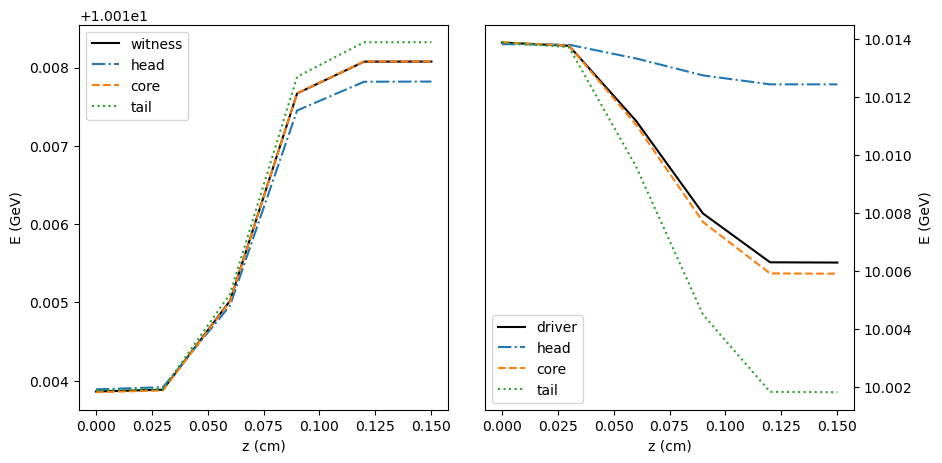

In [4]:
##### plot energy gain & loss

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
plt.subplots_adjust(wspace=0.1, hspace=0)

ax1.set_ylabel(r"E (GeV)")
ax2.set_ylabel(r"E (GeV)")
ax1.set_xlabel('z (cm)')
ax2.set_xlabel('z (cm)')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# adjust L units
L_E = df_E1['L'] * 10**2

# witness beam
ax1.plot(L_E,df_E1['E'],label = 'witness',c = 'k')

ax1.plot(L_E,df_E1_H['E'],linestyle = 'dashdot',label = 'head')
ax1.plot(L_E,df_E1_C['E'],linestyle = '--',label = 'core')
ax1.plot(L_E,df_E1_T['E'],linestyle = 'dotted',label = 'tail')

# drive beam
ax2.plot(L_E,df_E2['E'],label = 'driver',c = 'k')

ax2.plot(L_E,df_E2_H['E'],linestyle = 'dashdot',label = 'head')
ax2.plot(L_E,df_E2_C['E'],linestyle = '--',label = 'core')
ax2.plot(L_E,df_E2_T['E'],linestyle = 'dotted',label = 'tail')

ax2.legend(loc = 'lower left')
ax1.legend()

#plt.savefig('/Users/Mengshutang/desktop/energy_gain.png',dpi = 300)

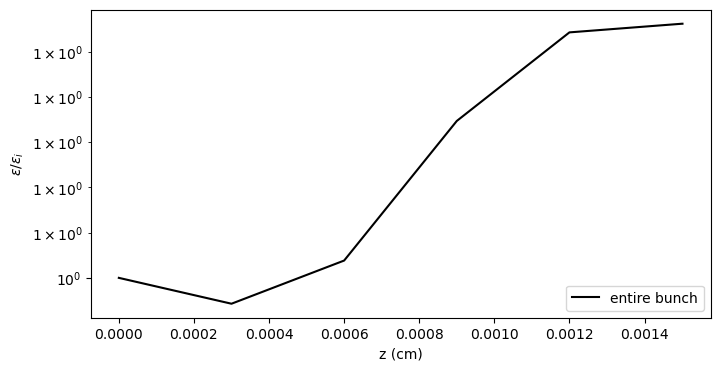

In [5]:
# normalized ts emittance
emit_ps_ratio = df_emit1['ps_n']/df_emit1['ps_n'][0]
emit_ts_ratio = df_emit1['ts_n']/df_emit1['ts_n'][0]

plt.figure(figsize=(8,4))

plt.plot(df_emit1['L'],emit_ts_ratio,c = 'k',label = 'entire bunch')

#plt.plot(L_travel,emit_ts_H,c = 'b',linestyle = 'dotted',label = 'head')
#plt.plot(L_travel,emit_ts_C,c = 'r',linestyle = '--',label = 'core')
#plt.plot(L_travel,emit_ts_T,c = 'g',linestyle = 'dashdot',label = 'tail')

plt.legend(loc = 'lower right')
plt.xlabel('z (cm)')
plt.ylabel(r'$\epsilon$/$\epsilon_i$')
plt.yscale('log')
#plt.savefig('/Users/mengshutang/desktop/emit_comp.png',dpi = 300)

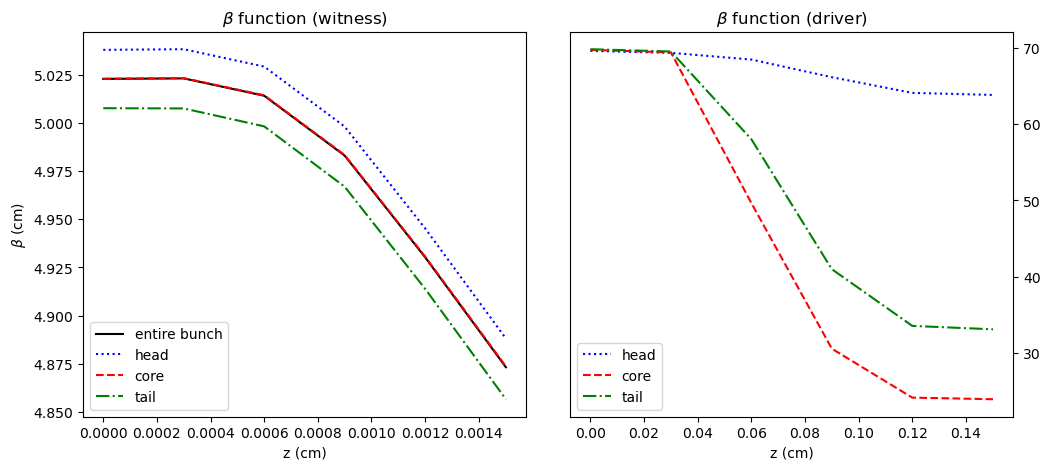

In [6]:
####### beta function in lens

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
plt.subplots_adjust(wspace=0.1, hspace=0)

# plot settings
ax1.set_xlabel(r'z (cm)')
ax2.set_xlabel(r'z (cm)')

ax1.set_ylabel(r'$\beta$ (cm)')

ax1.set_title(r"$\beta$ function (witness)")
ax2.set_title(r"$\beta$ function (driver)")

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# adjust L range
L_twiss = df_twiss1['L']*10**2

# witness

ax1.plot(df_twiss1['L'],df_twiss1['beta']*100,c = 'k',label = 'entire bunch')

ax1.plot(df_twiss1_H['L'],df_twiss1_H['beta']*100,c = 'b',linestyle = 'dotted',label = 'head')
ax1.plot(df_twiss1_C['L'],df_twiss1_C['beta']*100,c = 'r',linestyle = '--',label = 'core')
ax1.plot(df_twiss1_T['L'],df_twiss1_T['beta']*100,c = 'g',linestyle = 'dashdot',label = 'tail')

#min_index = np.argsort(beta_w)[0]
#ax1.axvline(x = L_travel[min_index], ymax = 0.1, linestyle = '--',c = 'k')

# driver

#plt.plot(L_travel,beta_d*100,c = 'k',label = 'entire bunch')

ax2.plot(L_twiss,df_twiss2_H['beta']*100,c = 'b',linestyle = 'dotted',label = 'head')
ax2.plot(L_twiss,df_twiss2_C['beta']*100,c = 'r',linestyle = '--',label = 'core')
ax2.plot(L_twiss,df_twiss2_T['beta']*100,c = 'g',linestyle = 'dashdot',label = 'tail')

#min_index = np.argsort(beta_d_T)[0]
#ax2.axvline(x = L_travel[min_index], ymax = 0.07, linestyle = '--',c = 'green')

ax1.legend(loc = 'lower left')
ax2.legend(loc = 'lower left')

#plt.savefig('/Users/Mengshutang/desktop/witness.png',dpi = 300)

0.02582741990022375 0.02574623556333951
-0.00015791010316066868 0.05023010407875815


Text(0, 0.5, '$\\beta_x$ (cm)')

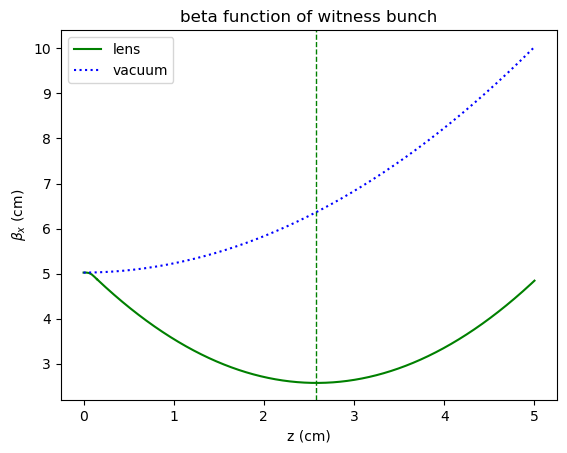

In [7]:
### beta function evolution of the witness bunch
a0 = df_twiss1['alpha'].iloc[-1]
b0 = df_twiss1['beta'].iloc[-1]
g0 = df_twiss1['gamma'].iloc[-1]
L0 = df_twiss1['L'].iloc[-1]
zf = a0/g0 + L0
bf = b0/(1+a0**2)

av = df_twiss1['alpha'].iloc[0]
bv = df_twiss1['beta'].iloc[0]
gv = df_twiss1['gamma'].iloc[0]
zf_v = av/gv
bf_v = bv/(1+av**2)

def beta_prop(x,a,b,g,L):
    return b*100 - 2*(x-L)*a + (x-L)**2 * g/100

upp = 5
x = np.linspace(L0*100,upp,10**4) 
xv = np.linspace(0,upp,10**4) 

plt.plot(L_twiss,df_twiss1['beta']*100,c = 'g',linestyle = '-')
plt.plot(x,beta_prop(x,a0,b0,g0,L0*100),linestyle = '-', c = 'g', label = 'lens')
plt.axvline(x = zf*100,linestyle = '--', c= 'g',linewidth = 1)

plt.plot(xv,beta_prop(xv,av,bv,gv,0),linestyle = 'dotted', c = 'b', label = 'vacuum')
#plt.axvline(x = zf_v*100,linestyle = 'dashdot', c= 'b',linewidth = 1)

plt.title('beta function of witness bunch')
plt.legend()
print(zf,bf)
print(zf_v,bf_v)
#plt.yscale('log')

plt.xlabel('z (cm)')
plt.ylabel (r'$\beta_x$ (cm)')
#plt.savefig('/Users/Mengshutang/desktop/witness.png',dpi = 300)